<a href="https://colab.research.google.com/github/MatiasHolmemoMardal/FastMONAI/blob/main/Spleen_semantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary semantic segmentation spleen

In [1]:
%pip install fastmonai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━

In [2]:
from fastMONAI.vision_all import *

from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split

### Download external data


We use the MONAI function `DecathlonDataset` to download the data and generate items for training. 

set path

In [3]:
path = Path('../data')
path.mkdir(exist_ok=True)


Download the heart dataset

In [4]:
training_data = DecathlonDataset(root_dir=path, task="Task09_Spleen", section="training", 
    download=True, cache_num=0, num_workers=3)

Task09_Spleen.tar: 1.50GB [01:30, 17.8MB/s]                            

2023-04-21 15:43:31,118 - INFO - Downloaded: ../data/Task09_Spleen.tar


2023-04-21 15:43:34,437 - INFO - Verified 'Task09_Spleen.tar', md5: 410d4a301da4e5b2f6f86ec3ddba524e.
2023-04-21 15:43:34,440 - INFO - Writing into directory: ../data.


Put dataset into a dataframe and print the shape

In [5]:
df = pd.DataFrame(training_data.data)
df.shape

(33, 2)

In [13]:
df.head()

,image,label
0,../data/Task09_Spleen/imagesTr/spleen_10.nii.gz,../data/Task09_Spleen/labelsTr/spleen_10.nii.gz
1,../data/Task09_Spleen/imagesTr/spleen_24.nii.gz,../data/Task09_Spleen/labelsTr/spleen_24.nii.gz
2,../data/Task09_Spleen/imagesTr/spleen_63.nii.gz,../data/Task09_Spleen/labelsTr/spleen_63.nii.gz
3,../data/Task09_Spleen/imagesTr/spleen_41.nii.gz,../data/Task09_Spleen/labelsTr/spleen_41.nii.gz
4,../data/Task09_Spleen/imagesTr/spleen_45.nii.gz,../data/Task09_Spleen/labelsTr/spleen_45.nii.gz


Split the labled data into training and test

In [6]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((29, 2), (4, 2))

In [14]:
train_df.head()

,image,label
8,../data/Task09_Spleen/imagesTr/spleen_44.nii.gz,../data/Task09_Spleen/labelsTr/spleen_44.nii.gz
9,../data/Task09_Spleen/imagesTr/spleen_14.nii.gz,../data/Task09_Spleen/labelsTr/spleen_14.nii.gz
19,../data/Task09_Spleen/imagesTr/spleen_8.nii.gz,../data/Task09_Spleen/labelsTr/spleen_8.nii.gz
21,../data/Task09_Spleen/imagesTr/spleen_16.nii.gz,../data/Task09_Spleen/labelsTr/spleen_16.nii.gz
12,../data/Task09_Spleen/imagesTr/spleen_9.nii.gz,../data/Task09_Spleen/labelsTr/spleen_9.nii.gz


In [15]:
test_df.head()

,image,label
31,../data/Task09_Spleen/imagesTr/spleen_40.nii.gz,../data/Task09_Spleen/labelsTr/spleen_40.nii.gz
15,../data/Task09_Spleen/imagesTr/spleen_60.nii.gz,../data/Task09_Spleen/labelsTr/spleen_60.nii.gz
26,../data/Task09_Spleen/imagesTr/spleen_18.nii.gz,../data/Task09_Spleen/labelsTr/spleen_18.nii.gz
17,../data/Task09_Spleen/imagesTr/spleen_6.nii.gz,../data/Task09_Spleen/labelsTr/spleen_6.nii.gz


### Examine the training data

Each class label will be counted for the masks (including the background) if you pass in the mask path and define the `dtype` to be `MedMask` in `MedDataset`

Create a MedDataset instance and preprocess the data, also summarizing the dataset information.

In [7]:
med_dataset = MedDataset(img_list=train_df.label.tolist(), dtype=MedMask, max_workers=12)

In [8]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1
0,../data/Task09_Spleen/labelsTr/spleen_44.nii.gz,512,512,92,0.8711,0.8711,5.0,RAS+,24085911,31337
1,../data/Task09_Spleen/labelsTr/spleen_14.nii.gz,512,512,54,0.8516,0.8516,5.0,RAS+,14031613,124163
2,../data/Task09_Spleen/labelsTr/spleen_8.nii.gz,512,512,31,0.7852,0.7852,7.5,RAS+,8017987,108477
3,../data/Task09_Spleen/labelsTr/spleen_16.nii.gz,512,512,61,0.7930,0.7930,8.0,RAS+,15950740,40044
4,../data/Task09_Spleen/labelsTr/spleen_9.nii.gz,512,512,41,0.7441,0.7441,5.0,RAS+,10650694,97210


In [9]:
data_info_df = med_dataset.summary()

In [10]:
data_info_df.head()

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,512,512,31,0.7852,0.7852,7.5,RAS+,../data/Task09_Spleen/labelsTr/spleen_8.nii.gz,1
15,512,512,89,0.7266,0.7266,2.5,RAS+,../data/Task09_Spleen/labelsTr/spleen_21.nii.gz,1
27,512,512,156,0.8359,0.8359,3.0,RAS+,../data/Task09_Spleen/labelsTr/spleen_53.nii.gz,1
26,512,512,148,0.9688,0.9688,1.5,RAS+,../data/Task09_Spleen/labelsTr/spleen_22.nii.gz,1
25,512,512,119,0.7695,0.7695,4.0,RAS+,../data/Task09_Spleen/labelsTr/spleen_27.nii.gz,1


In [11]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([0.7852, 0.7852, 5.0], False)

In [12]:
bs=2

In [16]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[637.0, 637.0, 103.0]

Define data augmentation and preprocessing transformations.

In [36]:
size = [160,160,32]

In [51]:
item_tfms = [ZNormalization(), PadOrCrop(size)]  # RandomMotion()

Create a MedDataBlock instance and dataloaders for the training and validation sets.

In [52]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(valid_pct=0.1, seed=42), # By passing valid_pct=0.1, we tell it to get a random 10% of the training set for validation.
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      reorder=reorder,
                      resample=resample) 

Split into train and validation set

In [53]:
dls = dblock.dataloaders(train_df, bs=bs)

In [54]:
# training and validation
len(dls.train_ds.items), len(dls.valid_ds.items)

(27, 2)

Visualize a batch of data.

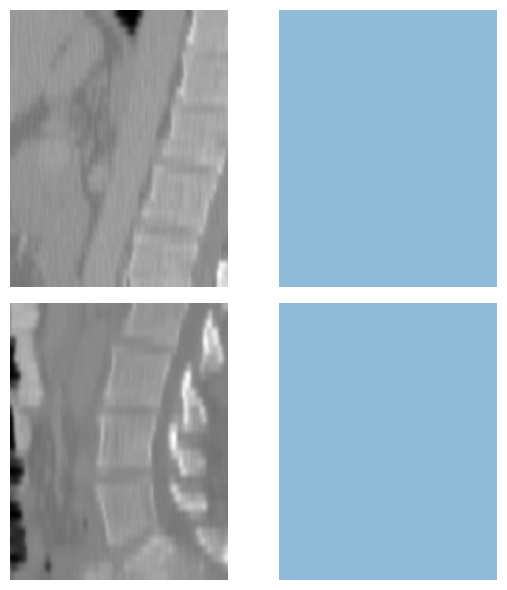

In [55]:
dls.show_batch()

### Create and train a 3D model

Define a 3D U-Net model with specific architecture parameters.

In [56]:
from monai.networks.nets import UNet
from monai.losses import DiceLoss

In [86]:
model = UNet(spatial_dims=3, in_channels=1, out_channels=1, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), num_res_units=2)
model = model.model

Define the DiceLoss as the loss function for training.

In [87]:
loss_func = CustomLoss(loss_func=DiceLoss(sigmoid=True, reduction="mean"))

Create a Learner object with the model, loss function, and optimizer (Ranger).

In [88]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=binary_dice_score)

Perform learning rate finding to determine the optimal learning rate for training.

SuggestedLRs(valley=0.3630780577659607)

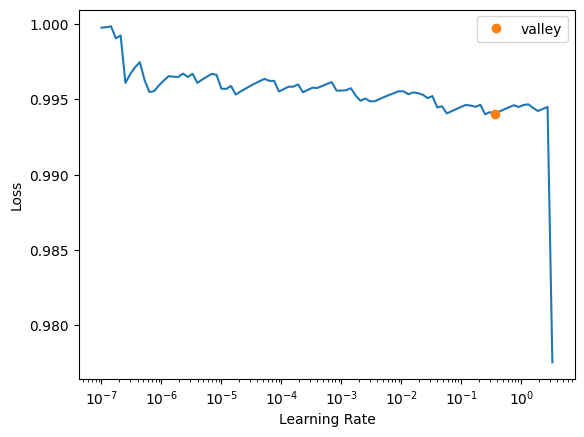

In [99]:
learn.lr_find()

Apply the learning rate to the learning pipeline

In [102]:
lr = 1e-1

In [ ]:
callbacks = EarlyStoppingCallback(monitor='valid_loss', patience=3)

Check that the label file is between 0 and 1

In [85]:
import nibabel as nib
import numpy as np

label_file = "../data/Task09_Spleen/labelsTr/spleen_44.nii.gz"
label_data = nib.load(label_file).get_fdata()
print("Unique values in the label file:", np.unique(label_data))

Unique values in the label file: [0. 1.]


Check that the output shape is between 0 and 1

In [62]:
x, y = dls.one_batch()
print("Input shape:", x.shape)
print("Target shape:", y.shape)

pred = model(x)
print("Model output shape:", pred.shape)
print("Model output values:", pred.detach().cpu().numpy())


Input shape: torch.Size([2, 1, 160, 160, 32])
Target shape: torch.Size([2, 1, 160, 160, 32])
Model output shape: torch.Size([2, 1, 160, 160, 32])
Model output values: [[[[[ 1.8499094   2.7367065   2.6303394  ...  1.7238061   1.90939
      1.2955825 ]
    [ 2.7115161   3.8851814   3.6303384  ...  2.394024    2.4865875
      1.6410477 ]
    [ 2.6811578   3.9422274   3.7236955  ...  1.8446951   2.0580964
      1.3878889 ]
    ...
    [ 1.7417803   2.2507808   2.7783995  ...  5.790637    5.737566
      4.006035  ]
    [ 1.6115526   2.5073352   2.5383759  ...  5.1529903   5.0536494
      3.7433295 ]
    [ 1.0378318   1.5094929   1.7634305  ...  2.9267724   3.00571
      2.1040814 ]]

   [[ 2.7503495   4.0123057   3.477953   ...  2.7502182   2.5818276
      1.814984  ]
    [ 3.8760357   5.72893     5.19339    ...  3.3833685   3.4615715
      2.435616  ]
    [ 4.256901    6.1475186   5.4895873  ...  3.2544336   2.980087
      2.005572  ]
    ...
    [ 1.8109975   2.6302474   2.7761977  ...  8

Verify the data: Ensure that the input data and ground truth masks do not contain any NaN values or other inconsistencies. 

In [78]:
for i, (image, label) in enumerate(dls.train):
    if torch.isnan(image).any() or torch.isnan(label).any():
        print(f"Found NaN values at index {i}")


Test the loss function with random tensors: To ensure that the loss function itself is not causing NaN values, create random tensors and pass them through the loss function:

In [80]:
random_pred = torch.rand(2, 1, 160, 160, 32)
random_target = torch.rand(2, 1, 160, 160, 32)

loss = loss_func.loss_func(random_pred, random_target)
print("Loss:", loss.item())


Loss: 0.44636818766593933


Monitor model weights: Check the model weights during training to ensure they are not becoming NaN or extremely large values. 

> Now, when you train your model using learn.fit_flat_cos() or any other training method, the MonitorWeights callback will monitor the model weights and report if there's any issue with them. If it detects any NaN or extremely large values, it will print a message and stop the training. This might help you understand if the problem is related to the model weights or gradients.

In [89]:
class MonitorWeights(Callback):
    def after_backward(self):
        for name, param in self.model.named_parameters():
            if param.grad is not None and (torch.isnan(param.grad).any() or torch.isnan(param.data).any()):
                print(f"NaN value detected in {name}")
                raise ValueError("NaN value in gradients or weights")

learn.add_cb(MonitorWeights())

Train the model with fit_flat_cos() with 30 epochs

In [90]:
learn.fit_flat_cos(3, lr)


epoch,train_loss,valid_loss,binary_dice_score,time
0,0.995705,0.983130,nan,02:03
1,0.995865,0.982970,nan,02:08
2,0.995923,0.982872,nan,02:00


visual representation of the training progress of the deep learning model, plotting the loss over time

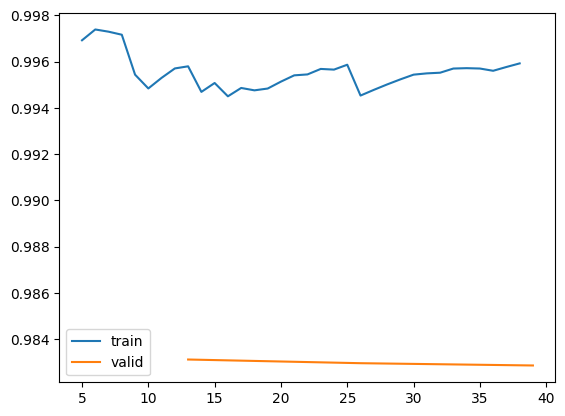

In [91]:
learn.recorder.plot_loss()

Save the model

In [92]:
learn.save('spleen-model')

Path('models/spleen-model.pth')

Show results with target and prediction

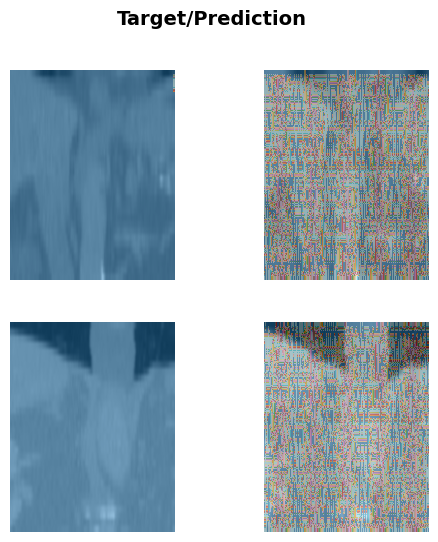

In [93]:
learn.show_results(anatomical_plane=1)

Export the model

In [100]:
if 'google.colab' in str(get_ipython()):
  temp_path = Path('/content/drive/MyDrive/DAT255/FastMONAI/models')
else:
  temp_path = Path(os.getcwd())
learn.path = temp_path

In [101]:
learn.export('fastmonai_model_spleen.pkl')

RuntimeError: ignored

### Test the model

In [94]:
test_dl = learn.dls.test_dl(test_df,with_labels=True)

Show batch with picture and mask

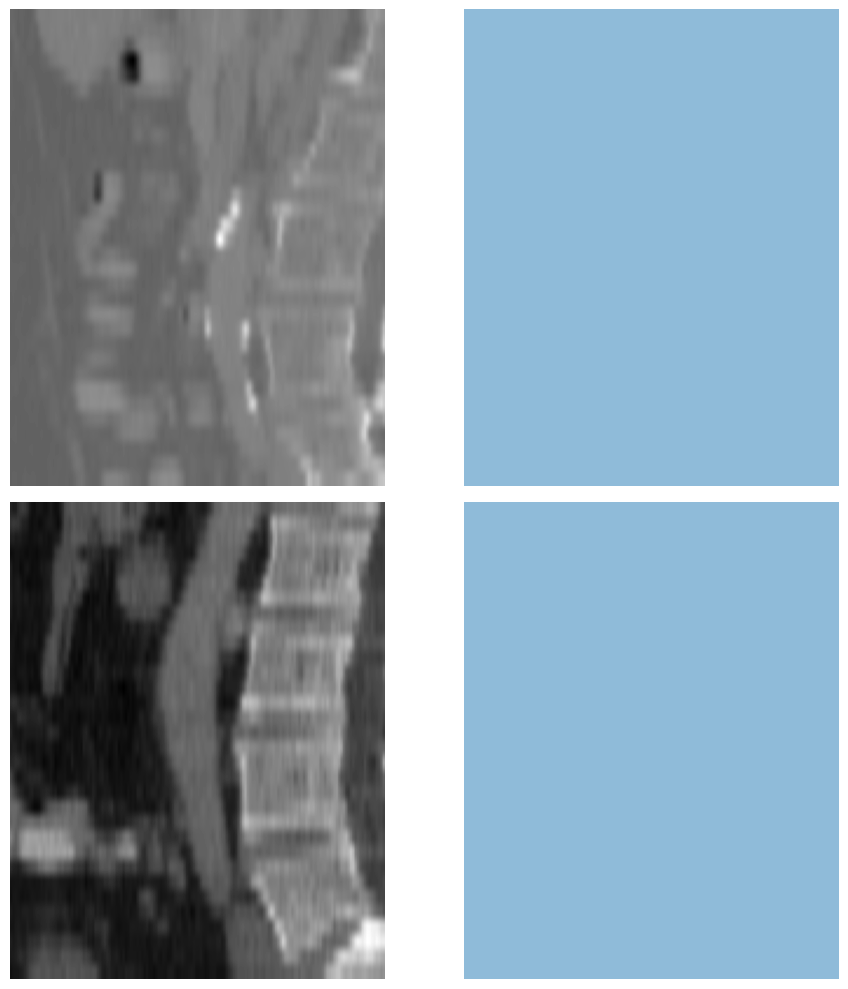

In [95]:
test_dl.show_batch(anatomical_plane=0, figsize=(10,10))

In [96]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([4, 1, 160, 160, 32]), torch.Size([4, 1, 160, 160, 32]))

Get the dice score

In [97]:
binary_dice_score(pred_acts, labels)

tensor(nan)

Show batch with target and prediction

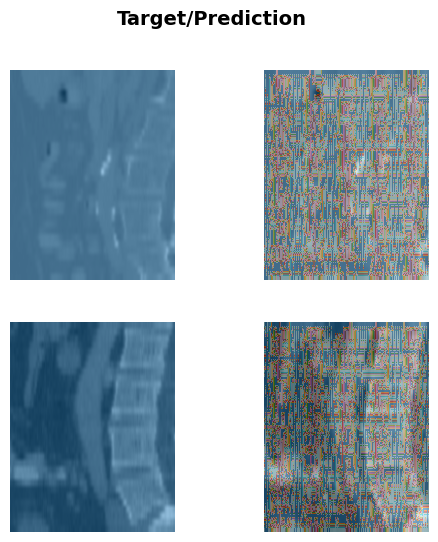

In [98]:
learn.show_results(anatomical_plane=0, dl=test_dl)